<a href="https://colab.research.google.com/github/ShiviV/Project/blob/master/Checking%20stationarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
#Dependencies
import csv
import numpy as np
import pandas as pd
from sklearn.svm import SVR
import matplotlib.pyplot as plt


In [38]:
data=pd.read_csv('/content/TSLA.csv')
data.head(10)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       63 non-null     object 
 1   Open       63 non-null     float64
 2   High       63 non-null     float64
 3   Low        63 non-null     float64
 4   Close      63 non-null     float64
 5   Adj Close  63 non-null     float64
 6   Volume     63 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 3.6+ KB


In [39]:
print("dimension of  data: {}".format(data.shape))

dimension of  data: (63, 7)


In [40]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,63.000000,63.000000,63.000000,63.000000,63.000000,6.300000e+01
mean,444.445717,454.784920,432.924603,444.325714,444.325714,4.965787e+07
std,58.110543,58.659158,57.836216,59.706816,59.706816,2.397476e+07
min,356.000000,368.739990,329.880005,330.209991,330.209991,1.735770e+07
25%,415.324997,421.490006,406.574996,414.535004,414.535004,3.225680e+07
50%,429.600006,436.570007,420.100006,425.299988,425.299988,4.255200e+07
75%,449.065002,457.180008,437.589996,448.520005,448.520005,6.273920e+07
max,602.210022,607.799988,585.500000,599.039978,599.039978,1.154657e+08


In [41]:
data['Date']=pd.to_datetime(data['Date'])

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       63 non-null     datetime64[ns]
 1   Open       63 non-null     float64       
 2   High       63 non-null     float64       
 3   Low        63 non-null     float64       
 4   Close      63 non-null     float64       
 5   Adj Close  63 non-null     float64       
 6   Volume     63 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 3.6 KB


In [43]:
data_n=data[['Date','Open']]

In [44]:
data_n

,Date,Open
0,2020-09-08,356.000000
1,2020-09-09,356.600006
2,2020-09-10,386.209991
3,2020-09-11,381.940002
4,2020-09-14,380.950012
...,...,...
58,2020-11-30,602.210022
59,2020-12-01,597.590027
60,2020-12-02,556.440002
61,2020-12-03,590.020020


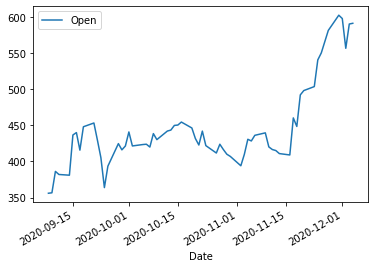

In [45]:
data_n.plot(x='Date')
plt.show()

In [19]:
#Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
#Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary

In [52]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    #rolmean = pd.rolling_mean(timeseries, window=12)
    rolmean=timeseries.rolling(5).mean()
    rolstd =timeseries.rolling(5).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

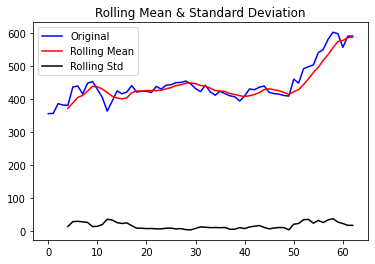

Results of Dickey-Fuller Test:
Test Statistic                 -0.597313
p-value                         0.871588
#Lags Used                      0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [53]:
ts=data_n['Open']
test_stationarity(ts)

In [22]:
#So not stationary

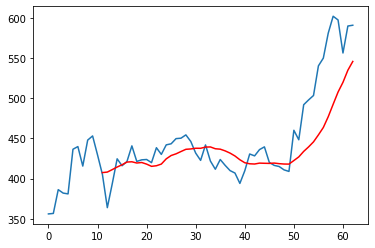

In [24]:
moving_avg = ts.rolling(12).mean()
plt.plot(ts)
plt.plot(moving_avg, color='red')

In [25]:
ts_log_moving_avg_diff = ts - moving_avg
ts_log_moving_avg_diff.head(12)

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          NaN
10         NaN
11   -2.303332
Name: Open, dtype: float64

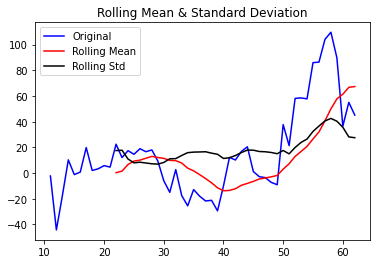

Results of Dickey-Fuller Test:
Test Statistic                 -1.795221
p-value                         0.382837
#Lags Used                      0.000000
Number of Observations Used    51.000000
Critical Value (1%)            -3.565624
Critical Value (5%)            -2.920142
Critical Value (10%)           -2.598015
dtype: float64


In [26]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

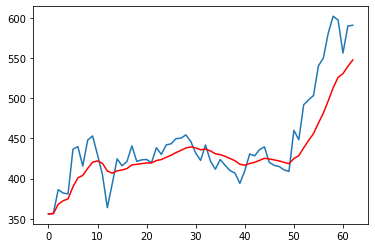

In [29]:
expwighted_avg = ts.ewm(span=12).mean()
plt.plot(ts)
plt.plot(expwighted_avg, color='red')

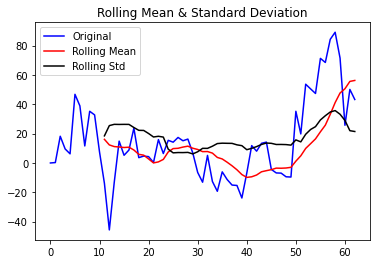

Results of Dickey-Fuller Test:
Test Statistic                 -2.494130
p-value                         0.116909
#Lags Used                      0.000000
Number of Observations Used    62.000000
Critical Value (1%)            -3.540523
Critical Value (5%)            -2.909427
Critical Value (10%)           -2.592314
dtype: float64


In [31]:
ts_log_ewma_diff = ts - expwighted_avg
test_stationarity(ts_log_ewma_diff)

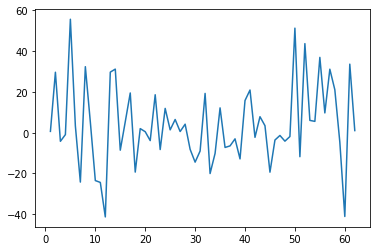

In [32]:
ts_log_diff = ts - ts.shift()
plt.plot(ts_log_diff)

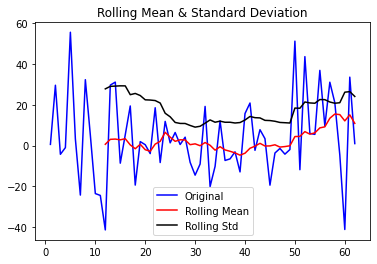

Results of Dickey-Fuller Test:
Test Statistic                -8.390383e+00
p-value                        2.375484e-13
#Lags Used                     0.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (1%)           -3.542413e+00
Critical Value (5%)           -2.910236e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


In [33]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)